In [1]:
%pip install pandas seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/Student Depression Dataset Cleaned.csv')
df.head()

,id,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33,Visakhapatnam,Very High,8.97,Low,5-6 hours,Healthy,B.Pharm,Yes,3,Low,No,Yes
1,8,Female,24,Bangalore,Low,5.90,Very High,5-6 hours,Moderate,BSc,No,3,Low,Yes,No
2,26,Male,31,Srinagar,Moderate,7.03,Very High,Less than 5 hours,Healthy,BA,No,9,Low,Yes,No
3,30,Female,28,Varanasi,Moderate,5.59,Low,7-8 hours,Moderate,BCA,Yes,4,Very High,Yes,Yes
4,32,Female,25,Jaipur,High,8.13,Moderate,5-6 hours,Moderate,M.Tech,Yes,1,Low,No,No


### Distribusi Data

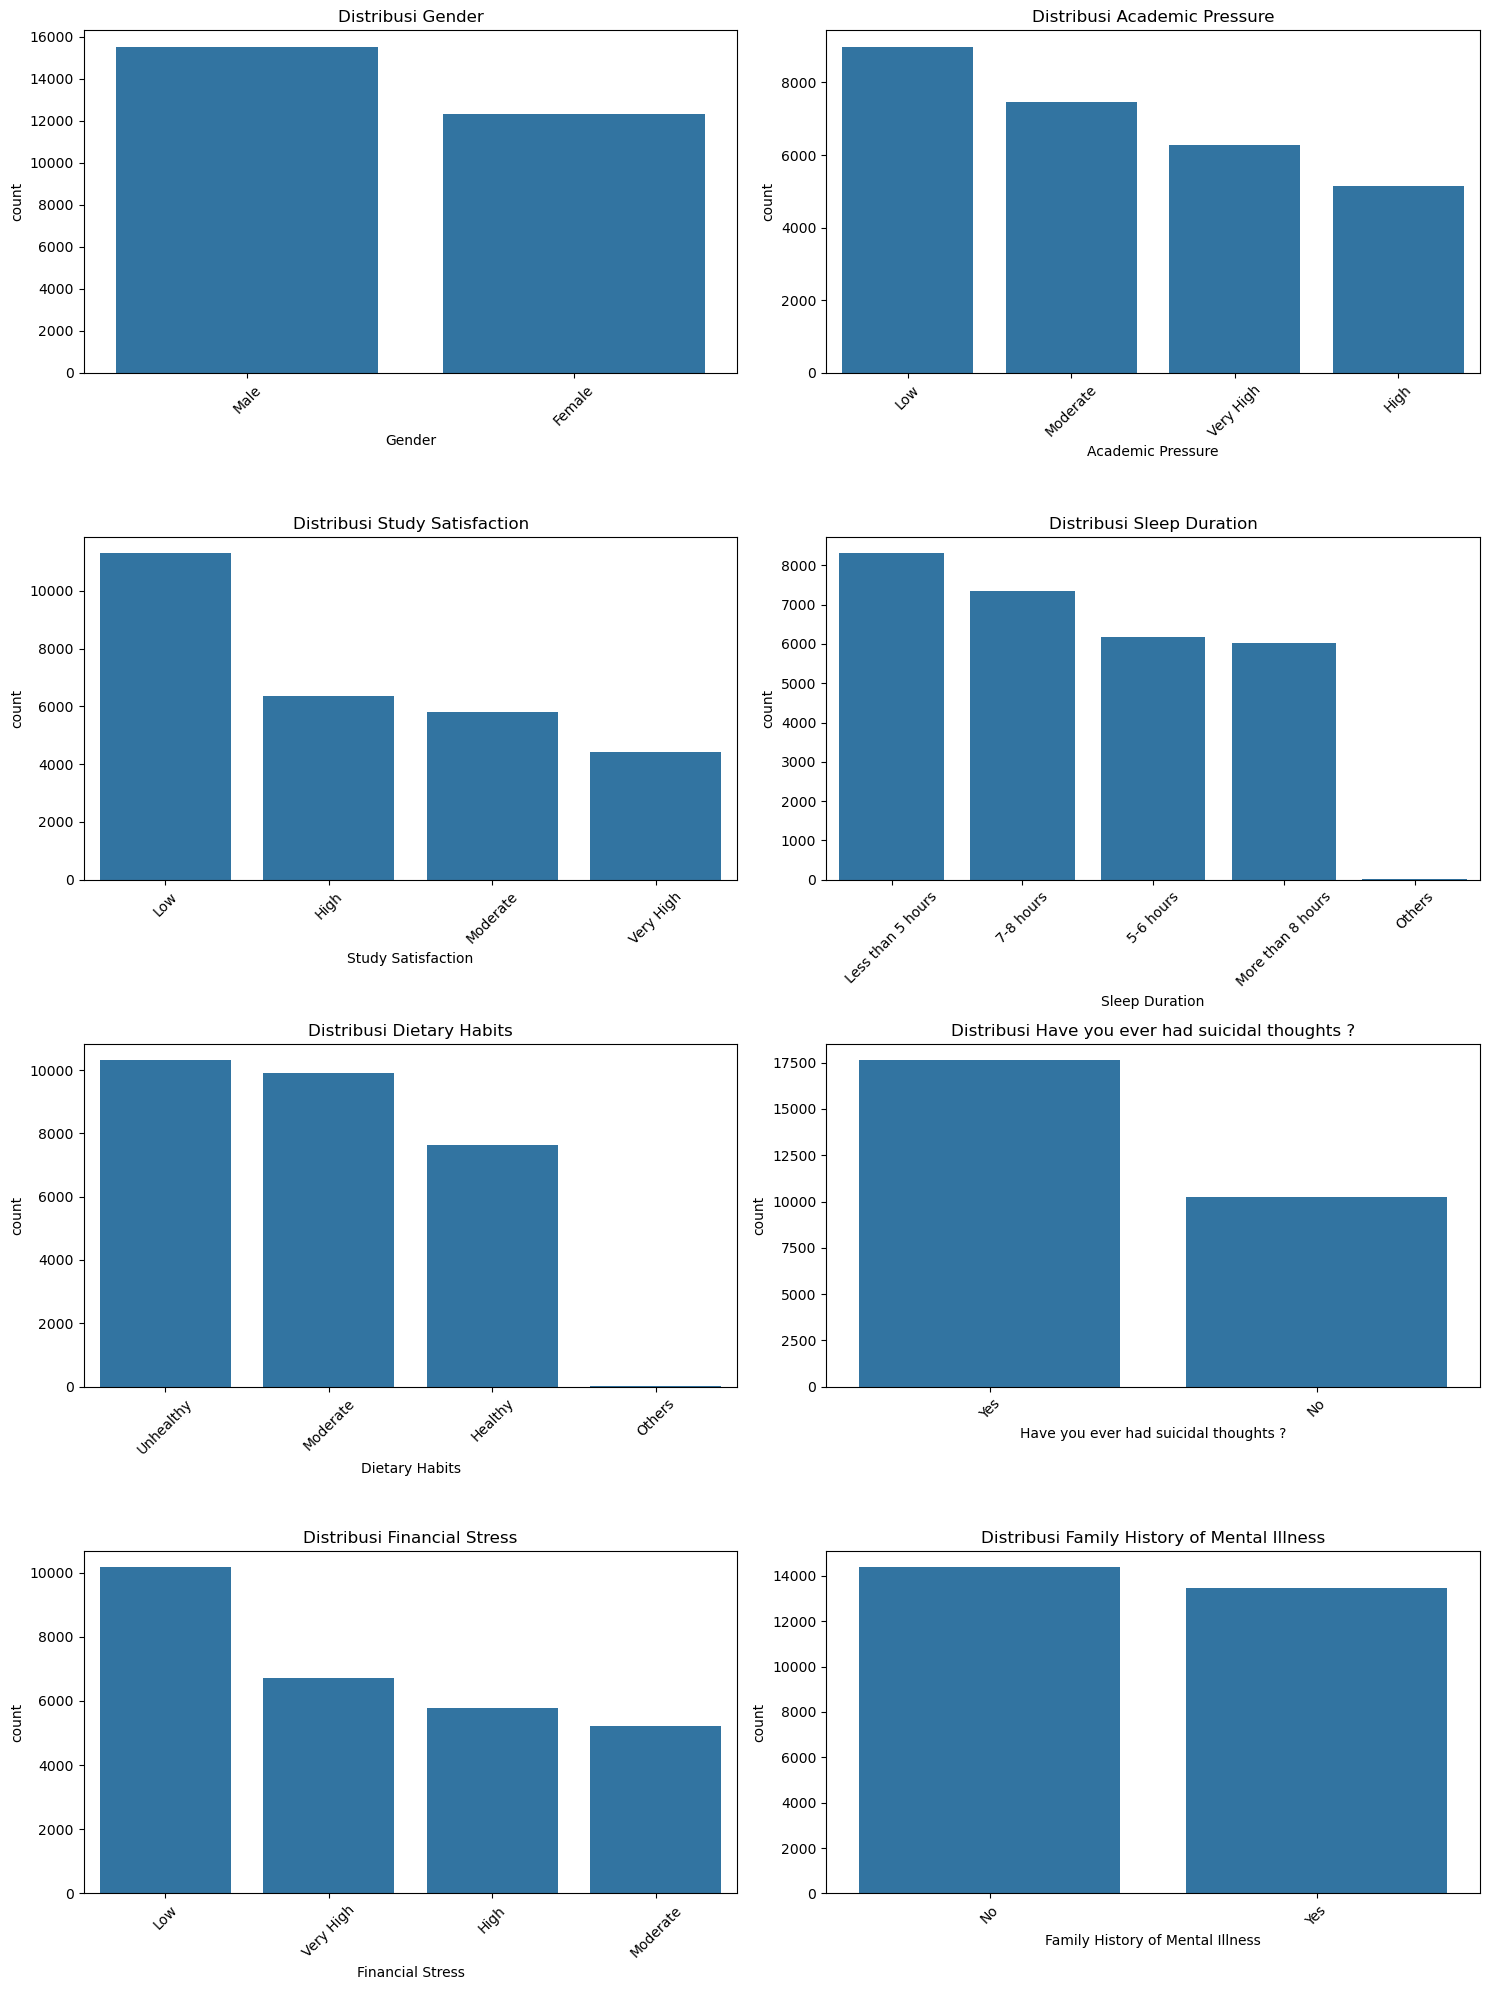

,Age,CGPA,Study Hours
count,27870.000000,27870.000000,27870.000000
mean,25.821134,7.656028,7.157948
std,4.906574,1.470835,3.707180
min,18.000000,0.000000,0.000000
25%,21.000000,6.290000,4.000000
50%,25.000000,7.770000,8.000000
75%,30.000000,8.920000,10.000000
max,59.000000,10.000000,12.000000


,City,Degree
count,27870,27870
unique,32,28
top,Kalyan,High School
freq,1565,6080


In [4]:
# Menghitung distribusi nilai untuk setiap kategori di kolom kategori
categorical_columns = [
    "Gender", "Academic Pressure", "Study Satisfaction", 
    "Sleep Duration", "Dietary Habits", "Have you ever had suicidal thoughts ?", 
    "Financial Stress", "Family History of Mental Illness"
]

categorical_counts = {col: df[col].value_counts() for col in categorical_columns}

# Statistik deskriptif untuk fitur numerik
numeric_summary = df[["Age", "CGPA", "Study Hours"]].describe()

# Statistik deskriptif untuk fitur kategori
demographic_summary = df[["City", "Degree"]].describe()

# Visualisasi distribusi kategori utama
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Distribusi {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif
display(numeric_summary, demographic_summary)

#### Distribusi Data Kategorikal

1. **Gender**: Mayoritas adalah laki-laki (55.7%), sedangkan perempuan 44.3%.
2. **Academic Pressure**:
    - 32.2% mengalami tekanan akademik rendah,
    - 26.7% sedang,
    - 22.6% sangat tinggi,
    - 18.5% tinggi.
3. **Study Satisfaction**: Mayoritas memiliki tingkat kepuasan belajar rendah (40.5%).
4. **Sleep Duration**: 29.8% tidur kurang dari 5 jam, hanya 26.3% tidur 7-8 jam.
5. **Dietary Habits**: 37% memiliki pola makan tidak sehat.
6. **Financial Stress**: 24% mengalami stres finansial sangat tinggi.
7. **Depresi**: 16.308 mahasiswa (58.5%) mengalami depresi.
8. **City**: Terdapat 46 kota yang diwakili dalam data, dengan kota terbanyak adalah Kalyan (1.564 mahasiswa).
9. **Degree**: Data mencakup 28 jenis gelar akademik, dengan yang paling umum adalah High School (6.080 mahasiswa).

#### Distribusi Data Numerik

- **Usia**: Rata-rata 25.8 tahun, dengan rentang 18–59 tahun.
- **CGPA**: Rata-rata 7.65 (skala 10), minimum 0, maksimum 10.
- **Study Hours**: Rata-rata mahasiswa belajar 7.15 jam per hari.

### Hubungan antara Variabel Kategorikal dan Depresi

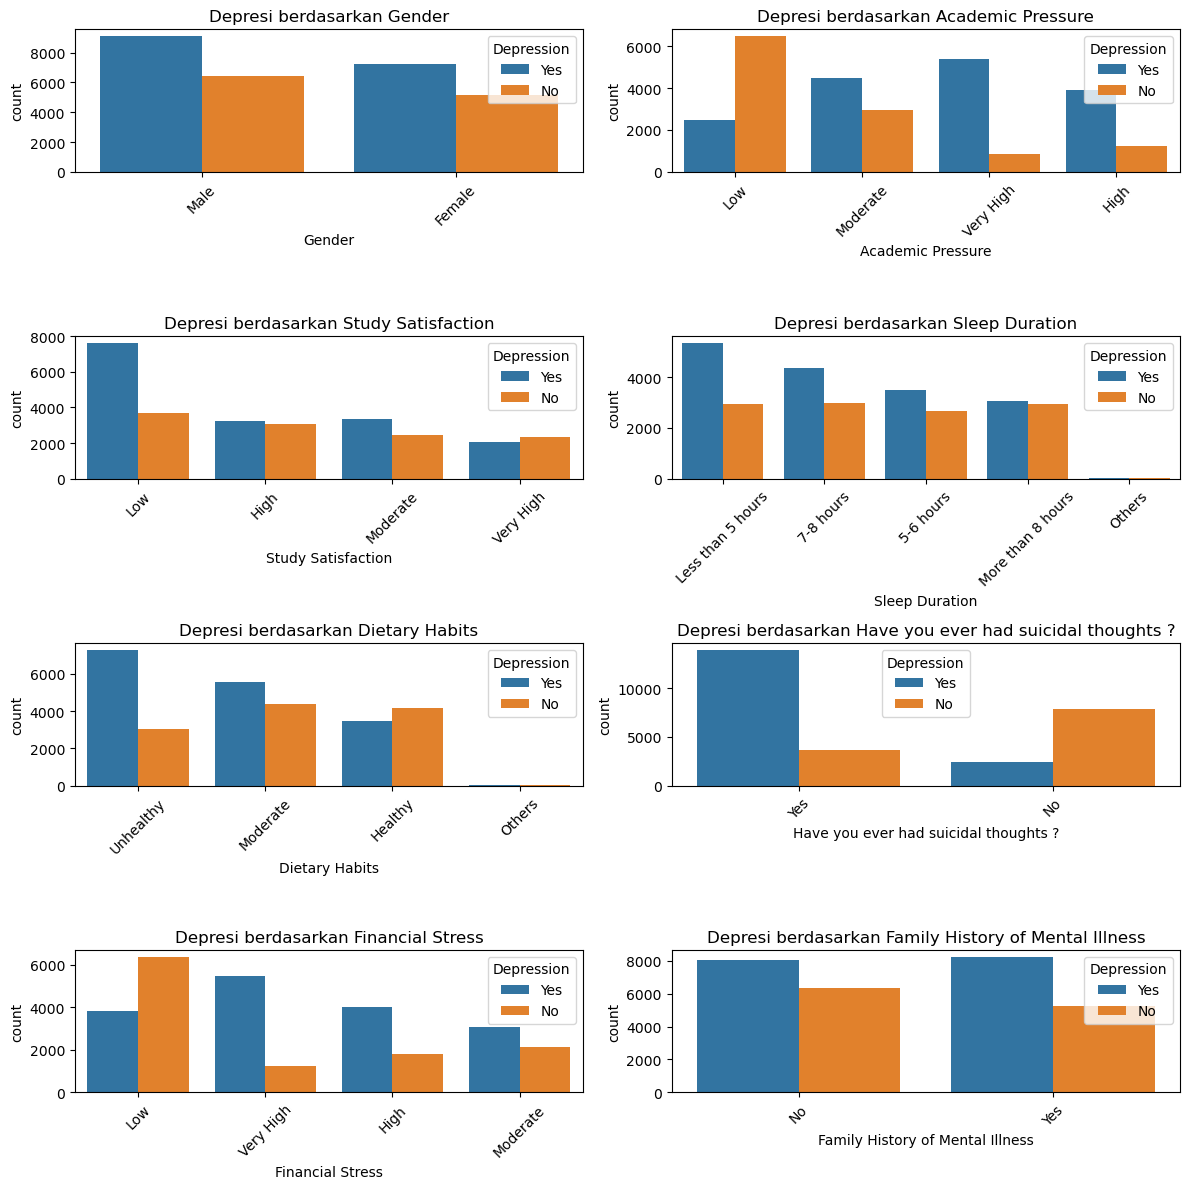

In [5]:
# Visualisasi hubungan faktor utama dengan depresi
fig, axes = plt.subplots(4, 2, figsize=(12, 12))
axes = axes.flatten()

columns_to_analyze = [
    "Gender", "Academic Pressure", "Study Satisfaction", 
    "Sleep Duration", "Dietary Habits", "Have you ever had suicidal thoughts ?", 
    "Financial Stress", "Family History of Mental Illness"
]

for i, col in enumerate(columns_to_analyze):
    sns.countplot(data=df, x=col, hue="Depression", ax=axes[i], order=df[col].value_counts().index)
    axes[i].set_title(f"Depresi berdasarkan {col}")
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

1. **Depresi berdasarkan Gender**  
   - Lebih banyak pria mengalami depresi dibandingkan wanita. Namun perlu diingat bahwa jumlah pria dalam dataset ini juga lebih banyak.

2. **Depresi berdasarkan Academic Pressure (Tekanan Akademik)**  
   - Individu dengan tekanan akademik tinggi dan sangat tinggi memiliki tingkat depresi yang lebih tinggi dibandingkan yang mengalami tekanan akademik rendah.

3. **Depresi berdasarkan Study Satisfaction (Kepuasan Studi)**  
   - Mayoritas individu yang memiliki kepuasan studi rendah mengalami depresi.
   - Semakin tinggi kepuasan studi, semakin rendah kemungkinan mengalami depresi.

4. **Depresi berdasarkan Sleep Duration (Durasi Tidur)**  
   - Individu yang tidur kurang dari 5 jam lebih banyak mengalami depresi.
   - Tidur dalam rentang 7-8 jam tampaknya lebih seimbang antara yang mengalami depresi dan tidak.

5. **Depresi berdasarkan Dietary Habits (Kebiasaan Makan)**  
   - Individu dengan kebiasaan makan tidak sehat cenderung lebih banyak mengalami depresi.
   - Kebiasaan makan yang lebih sehat berhubungan dengan tingkat depresi yang lebih rendah.

6. **Depresi berdasarkan Have you ever had suicidal thoughts? (Pernahkah memiliki pikiran untuk bunuh diri?)**  
   - Individu yang pernah memiliki pikiran untuk bunuh diri jauh lebih banyak mengalami depresi dibandingkan yang tidak.

7. **Depresi berdasarkan Financial Stress (Stres Finansial)**  
   - Stres finansial yang sangat tinggi dikaitkan dengan tingkat depresi yang lebih tinggi.
   - Mereka dengan stres finansial rendah cenderung lebih sedikit mengalami depresi.

8. **Depresi berdasarkan Family History of Mental Illness (Riwayat Keluarga dengan Penyakit Mental)**  
   - Individu yang memiliki riwayat keluarga dengan penyakit mental lebih banyak mengalami depresi dibandingkan yang tidak. Tetapi, perbedaannya tidak terlalu signifikan.

Kesimpulan dari keseluruhan plot ini menunjukkan bahwa faktor-faktor seperti tekanan akademik tinggi, kepuasan studi rendah, durasi tidur pendek, kebiasaan makan tidak sehat, stres finansial tinggi, serta memiliki pemikiran bunuh diri berkontribusi terhadap tingkat depresi yang lebih tinggi.

### **Analisis Plot Kasus Depresi Berdasarkan Kota dan Jurusan di India**  

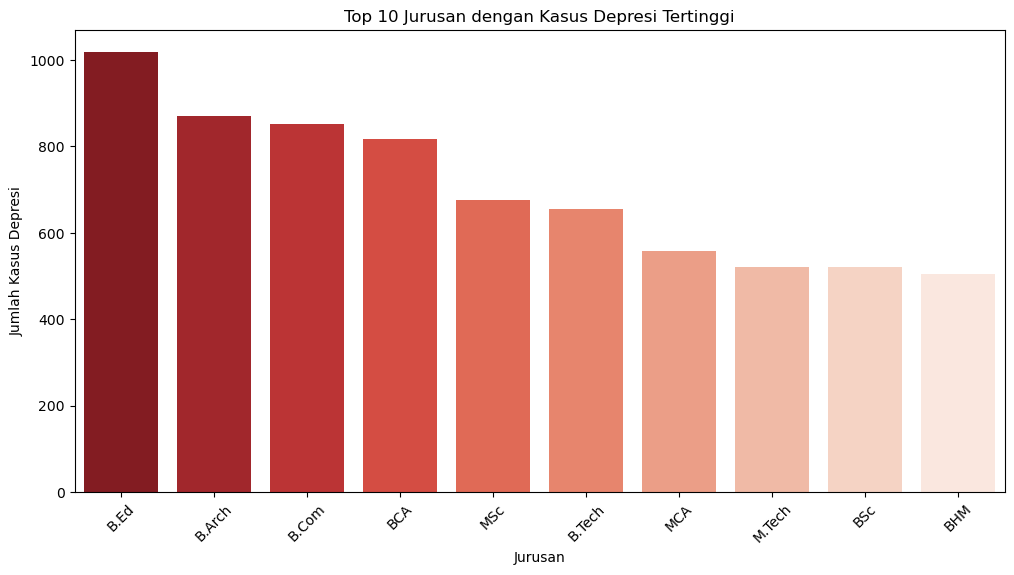

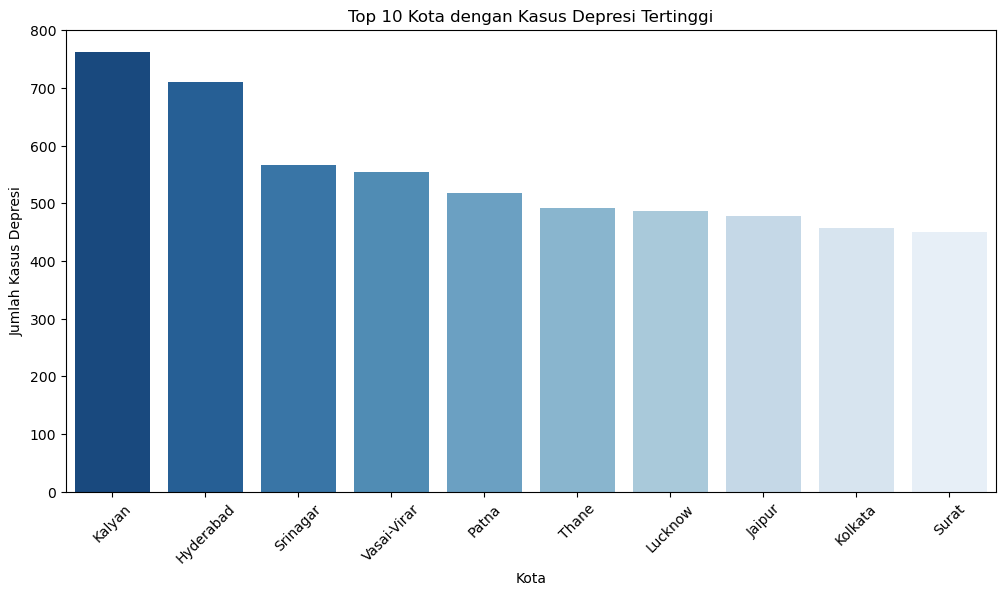

In [6]:
# Filter hanya yang mengalami depresi
depressed_df = df[df['Depression'] == 'Yes']  # Jika 'Depression' berbentuk kategori Yes/No

# Filter hanya mahasiswa karena mayoritas responden adalah Murid SMA untuk menghindari bias
depressed_df = depressed_df[depressed_df['Degree'] != 'High School']

# Hitung jumlah depresi berdasarkan Degree
degree_counts = depressed_df['Degree'].value_counts()

# Ambil Top 10
top_10_degrees = degree_counts.nlargest(10)

# Plot Degree
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_degrees.index, y=top_10_degrees.values, hue=top_10_degrees.index, palette='Reds_r', dodge=False, legend=False)
plt.xlabel("Jurusan")
plt.ylabel("Jumlah Kasus Depresi")
plt.title("Top 10 Jurusan dengan Kasus Depresi Tertinggi")
plt.xticks(rotation=45)
plt.show()

# Hitung jumlah depresi berdasarkan City
city_counts = depressed_df['City'].value_counts()

# Ambil Top 10 Cities
top_10_cities = city_counts.nlargest(10)

# Plot City
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_cities.index, y=top_10_cities.values, hue=top_10_cities.index, palette='Blues_r', dodge=False, legend=False)
plt.xlabel("Kota")
plt.ylabel("Jumlah Kasus Depresi")
plt.title("Top 10 Kota dengan Kasus Depresi Tertinggi")
plt.xticks(rotation=45)
plt.show()


❗ **Data ini tidak memasukkan Murid SMA (High School) untuk menghindari bias. Karena mayoritas merupakan murid SMA, hasil ini mungkin tidak mewakili populasi secara keseluruhan.**

Dua visualisasi yang diberikan menunjukkan distribusi kasus depresi berdasarkan **jurusan kuliah (degree)** dan **kota tempat tinggal** di India. Berikut adalah analisis berdasarkan data yang ditampilkan.

---

#### **Analisis Plot "Top 10 Jurusan dengan Kasus Depresi Tertinggi"**  

Grafik ini menunjukkan bahwa **B.Ed (Bachelor of Education) memiliki jumlah kasus depresi tertinggi**, diikuti oleh **B.Arch, B.Com, dan BCA**.  

##### **Evaluasi Keselarasan dengan Kenyataan**  
- **B.Ed (Pendidikan) tertinggi** → Masuk akal, karena mahasiswa pendidikan sering mengalami **beban akademik tinggi, tekanan sertifikasi, dan ketidakpastian karir**.  
- **B.Arch (Arsitektur) di peringkat tinggi** → Sesuai dengan kenyataan, karena studi arsitektur membutuhkan **proyek kompleks, tenggat waktu ketat, dan tekanan kreatif tinggi**.  
- **B.Com dan BCA (Bisnis & IT)** juga tinggi → Bidang ini memiliki **persaingan kerja tinggi dan ekspektasi industri yang ketat**, yang bisa menjadi pemicu stres.  
- **M.Tech dan MCA (Studi Pascasarjana dalam Teknologi)** masih masuk dalam daftar → Studi pascasarjana cenderung lebih menantang dengan penelitian dan proyek yang berat.  

Namun, **jurusan dengan tekanan akademik tinggi seperti Kedokteran (MBBS) atau Teknik (B.E/B.Tech) tidak mendominasi**, yang bisa jadi mengindikasikan **bias dalam pengambilan sampel**.  

---

#### **Analisis Plot "Top 10 Kota dengan Kasus Depresi Tertinggi"**  

Kota **Kalyan dan Hyderabad** memiliki jumlah kasus depresi tertinggi, diikuti oleh **Srinagar, Vasai-Virar, dan Kolkata**.  

##### **Evaluasi Keselarasan dengan Kenyataan**  
- **Kalyan & Hyderabad tertinggi** → Masuk akal, karena kedua kota ini berada di daerah urban dengan **beban ekonomi dan tekanan sosial tinggi**.  
- **Srinagar di daftar** → Sangat logis, karena kota ini mengalami **ketidakstabilan politik dan sosial**, yang dapat meningkatkan tingkat stres dan depresi.  
- **Kolkata & Lucknow dalam daftar** → Bisa dimengerti, karena kedua kota ini memiliki populasi besar dan urbanisasi yang cepat.  
- **Tidak ada Delhi, Mumbai, atau Bengaluru** → Bisa jadi karena **bias data**, di mana survei lebih banyak dilakukan di kota menengah daripada kota metropolitan besar.  

---

#### **Kesimpulan Keseluruhan**  
✔ **Sebagian besar hasil sesuai dengan realitas**, terutama untuk kota-kota dengan tekanan ekonomi dan jurusan dengan tuntutan akademik tinggi.  
❗ **Namun, ada indikasi bias dalam data**, seperti tidak adanya kota besar seperti Delhi atau Mumbai, serta beberapa jurusan dengan tekanan akademik tinggi yang tidak dominan.  

### Hubungan antara Variabel Numeric dan Depresi

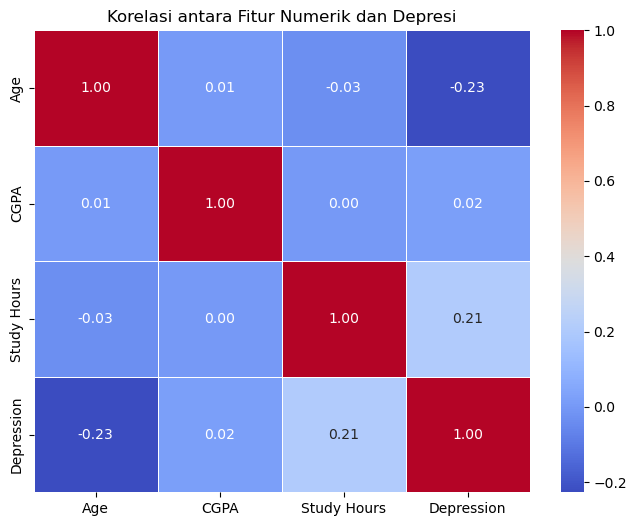

Age           -0.226738
CGPA           0.022164
Study Hours    0.209024
Name: Depression, dtype: float64

In [7]:
# Korelasi antara fitur numerik dan depresi
df_numeric = df.copy()

# Mengubah nilai "Depression" menjadi numerik (Yes = 1, No = 0)
df_numeric["Depression"] = df_numeric["Depression"].map({"Yes": 1, "No": 0})

# Korelasi fitur numerik dengan depresi
correlation = df_numeric[["Age", "CGPA", "Study Hours", "Depression"]].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Korelasi antara Fitur Numerik dan Depresi")
plt.show()

correlation["Depression"].drop("Depression")

1. **Age vs Depression (-0.23)**  
   - Korelasi negatif berarti semakin bertambah usia, kemungkinan mengalami depresi cenderung berkurang.  
   - Namun, nilai korelasi ini cukup rendah, menunjukkan hubungan yang lemah.

2. **CGPA vs Depression (0.02)**  
   - Korelasi hampir nol menunjukkan bahwa tidak ada hubungan yang signifikan antara CGPA (IPK) dengan depresi.  
   - Artinya, nilai akademik seseorang tidak terlalu mempengaruhi kemungkinan mengalami depresi.

3. **Study Hours vs Depression (0.21)**  
   - Korelasi positif menunjukkan bahwa semakin banyak waktu yang dihabiskan untuk belajar, semakin tinggi kemungkinan mengalami depresi.  
   - Namun, hubungan ini juga tidak terlalu kuat, tetapi ada indikasi bahwa beban belajar dapat berkontribusi terhadap stres dan depresi.

### Kesimpulan:
- **Usia memiliki sedikit korelasi negatif dengan depresi**, yang berarti semakin tua seseorang, cenderung lebih kecil kemungkinan mengalami depresi.
- **Jumlah jam belajar memiliki sedikit korelasi positif dengan depresi**, yang bisa menunjukkan bahwa tekanan akademik berkontribusi terhadap tingkat depresi.
- **IPK tidak memiliki hubungan yang berarti dengan depresi**, menunjukkan bahwa prestasi akademik seseorang tidak mempengaruhi kemungkinan mengalami depresi secara signifikan.

Meskipun ada beberapa hubungan yang terlihat, semua korelasi dalam heatmap ini relatif lemah, sehingga faktor-faktor lain di luar data ini mungkin lebih berpengaruh terhadap depresi.

Kesimpulan Faktor yang Mempengaruhi Depresi Pelajar:
- Study Satisfaction
- Academic Pressure
- Sleep Duration
- Dietary Habits
- Financial Stress
- Suicidal Thoughts (Jelas mempengaruhi)
- Study Hours